## Progress Report
<h1 style="font-size: 14px"><I>Team KungFu Pandas: Raj Patel, Ayush Jamindar, Amrita Rajesh, Saloni Mhatre, Lakshmi Krishna</I>

link to the notebook - https://github.com/uic-cs418/group-project-kungfu-pandas/blob/main/Progress_Report.ipynb </h1>
<div><img src= 'https://cdna.artstation.com/p/assets/images/images/037/325/102/medium/haengsook-oh-baby-po.jpg?1620094956' width=100></div>

#### Project Introduction

<h6 style='font-size : 12px'>
We are analyzing on the crime dataset and housing dataset. The crime dataset and housing dataset are publicly available at :

- Chicago Crime Data Source: https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/about_data
- Zillow Data Source: https://www.zillow.com/research/data/

Questions that we are investigating are `is there coorelationship between Housing prices and Crime in Chicago?`, `Which Neighborhood is not the safest to move in?`, `Has the Crime increased after post covid compare to Pre Covid?`, `Most common type of crime committed in Chicago area`
</h6>

#### Any Changes
<p style="font-size:12px">
We have added a new dataset to our project, "Housing Dataset". We will use this dataset to answer our question. For instance, is there correlation between housing prices and crime activity?
</p>

<h5 style="font-size: 16px">

`IMPORTANT NOTE`: 
</h5>

<h1 style="font-size: 14px">
Please create a folder called `csv_files`. This will contain all the CSV files so after downloading the data, please put it in this folder.



In [7]:
import pandas as pd
import numpy as np
from CleaningPR import *
from ML_pr import *
from Visualization import *
from EDA_pr import *
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

#### Data Cleaning Process
<!-- <div><img src= 'https://cdn-icons-png.flaticon.com/512/10179/10179118.png' width=100></div> -->
<h6 style="font-size: 12px">
This process contains the necessary steps like getting the data info such as data size, number of features, number of records, mean value, max value, etc. This step also includes dropping some columns and rows, adding more information, joining the dataframes and storing them into seperate CSV files for easier access in the future.
Crime Dataset Information and Cleaning

- This the crime data that we have accquired from the above link and it shows information about the crimes that took place in chicago from `January 2001` to `February 2024`
- Granularity: Each row in this data represents individual crime that has been reported with specs about each crime such as ID, Case Number, Date etc.
- Contains `~8 million` records
- steps
    1) Converting the Date
    2) Dropping the unecessary columns
    3) Filtering
    4) Saving the Dataframe to a CSV file (`Crimes_2017_to_2019.csv`, `Crimes_2021_to_Present.csv`, `Crimes_2014.csv`)
    </h6>

In [4]:
crime_data = pd.read_csv('csv_files/Crimes_2001_to_Present.csv')

In [5]:
'''
    cleanCrimeData method will perform Step 1,2,3 and 4.
    if want to see the cleaned version of pre-covid, post-covid crime data and decade crime data
    then try opening and printing the head of `Crimes_2017_to_2019.csv`, `Crimes_2021_to_Present.csv`, `Crimes_2014.csv`
'''
cleanCrimeData(crime_data)

Columns:  ['ID', 'New_Date', 'Primary Type', 'Location Description', 'Arrest', 'Community Area', 'RegionName']
Pre Covid Min new_date value:  2017-01-01 00:00:00
Pre Covid Max new_date value:  2019-12-31 23:55:00

Post Covid Min new_date value:  2021-01-01 00:00:00
Post Covid Max new_date value:  2024-02-10 00:00:00

Decade Crime Min new_date value:  2014-01-01 00:00:00
Decade Crime Max new_date value:  2024-02-10 00:00:00


<h1 style="font-size: 16px"> Neighborhood Dataset Information and Cleaning </h1>
<h1 style="font-size: 12px">

- The data we have acquired is from zillow and it shows the average house price for each nighborhood in the country
- Granularity: Each row represents a neighborhood in a state and shows the average house price for each month from `1-31-2000` to `1-31-2024`
- Contains average monthly prices for real estate of around `~21000` neighborhoods across the U.S.
- Steps
    1) Filtering
    - Extract data only from neighborhoods in Chicago. 
    2) Transposing the Data
    - Reseting the index, rotating the dataframe so that neighborhoods are now columns each row for the column
    is the average property price for each month. 
    This makes it easier to read the dataframe and perform aggregate functions.
    3) Saving the DataFrame (`neighborhood_data_2017_to_2019.csv`, `neighborhood_data_2021_present.csv`)
</h1 >

In [4]:
neighborhood_data = pd.read_csv('csv_files/Neighborhood_House_Price.csv')

In [5]:
'''
    cleanHousingData method will perform Step 1,2,and 3. 
    if want to see the cleaned version of pre-covid and post-covid data then 
    try opening and printing the head of `neighborhood_data_2017_to_2019.csv`, `neighborhood_data_2021_present.csv`
'''
cleanHousingData(neighborhood_data) 


#### Exploratory Data Analysis
The original crime data contains a lot of unecessary columns that we decide to take out. The cleaned data contaisn more of the revelant columns that help our investigation.
<!-- <div><img src= 'https://cdn-blog.scalablepath.com/uploads/2021/06/exploratory-data-analysis-900x615-1.png' width=100></div> -->

In [8]:
neighborhood_2017_2019 = pd.read_csv('csv_files/neighborhood_data_2017_2019.csv')
neighborhood_2021_present = pd.read_csv('csv_files/neighborhood_data_2021_present.csv')

In [9]:
print("HOUSE PRICE BETWEEN 2017-19")
get_neighborhood_price_stats(neighborhood_2017_2019)

HOUSE PRICE BETWEEN 2017-19

THE MINIMUM AND MAXIMUM HOUSE PRICES FOR EACH NEIGHBORHOOD AND THE DATES FOR WHEN THESE PRICES OCCURED

AVG MIN PRICE:  227166.85   AVG MAX PRICE:  255475.63

MEDIAN MIN PRICE:  212368.71   MEDIAN MAX PRICE:  242843.24

Cheapest House Price: Golden Gate $25263.13 2017-01-31

Expensive House Price: North Center $585356.81 2018-05-31

USING AVERAGE
	Cheapest Neighborhood: Golden Gate $37259.17

	Expensive Neighborhood: North Center $573486.19

USING MEDIAN
	Cheapest Neighborhood: Golden Gate $40088.27

	Expensive Neighborhood: North Center $574463.34



In [10]:
print("HOUSE PRICE BETWEEN 2021-present")
get_neighborhood_price_stats(neighborhood_2021_present)

HOUSE PRICE BETWEEN 2021-present

THE MINIMUM AND MAXIMUM HOUSE PRICES FOR EACH NEIGHBORHOOD AND THE DATES FOR WHEN THESE PRICES OCCURED

AVG MIN PRICE:  264325.93   AVG MAX PRICE:  299737.1

MEDIAN MIN PRICE:  260251.67   MEDIAN MAX PRICE:  294168.19

Cheapest House Price: Golden Gate $55617.85 2021-01-31

Expensive House Price: Ravenswood Manor $696986.36 2023-11-30

USING AVERAGE
	Cheapest Neighborhood: Ford City $68128.89

	Expensive Neighborhood: Ravenswood Manor $655318.56

USING MEDIAN
	Cheapest Neighborhood: Ford City $67676.01

	Expensive Neighborhood: Ravenswood Manor $658750.82



In [11]:
crime_data1 = pd.read_csv('csv_files/Crimes_2017_to_2019.csv')
print("CRIME STATS (2017-19)")
get_crime_stats(crime_data1)

CRIME STATS (2017-19)
Least Common Type of Crime:  ARSON
Most Common Type of Crime:  WEAPONS VIOLATION


Neighborhood with Least Arrest:  Edison Park , Number of Arrest:  79
Neighborhood with Most Arrest:  Austin , Number of Arrest:  11443


Neighborhood with Least Crime:  Edison Park , Number of Crimes:  777
Neighborhood with Most Crime:  Austin , Number of Crimes:  44856

TOP 5 LOCATION MOST CRIME
Location Description  NUM CRIME
              STREET     174926
           RESIDENCE     131615
           APARTMENT     101710
            SIDEWALK      62242
               OTHER      31925

TOP 5 LOCATION LEAST CRIME
Location Description  NUM CRIME
                YMCA          1
   RAILROAD PROPERTY          1
       ROOMING HOUSE          1
              OFFICE          1
        NURSING HOME          1




In [12]:
crime_data2= pd.read_csv('csv_files/Crimes_2021_to_Present.csv')
print("CRIME STATS (2021-Present)")
get_crime_stats(crime_data2)

CRIME STATS (2021-Present)
Least Common Type of Crime:  ARSON
Most Common Type of Crime:  WEAPONS VIOLATION


Neighborhood with Least Arrest:  Edison Park , Number of Arrest:  63
Neighborhood with Most Arrest:  Austin , Number of Arrest:  5743


Neighborhood with Least Crime:  Edison Park , Number of Crimes:  838
Neighborhood with Most Crime:  Austin , Number of Crimes:  37281

TOP 5 LOCATION MOST CRIME
                  Location Description  NUM CRIME
                                STREET     203027
                             APARTMENT     141976
                             RESIDENCE      95109
                              SIDEWALK      37672
PARKING LOT / GARAGE (NON RESIDENTIAL)      26416

TOP 5 LOCATION LEAST CRIME
Location Description  NUM CRIME
                FARM          1
        BANQUET HALL          1
  CTA SUBWAY STATION          1
            ELEVATOR          1
            BASEMENT          1




#### Visualizations
<!-- <div><img src= 'https://media.sproutsocial.com/uploads/2023/10/Data-Visualization-Final.jpg' width=100></div> -->

/Users/rajpatel/anaconda3/envs/cs418env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


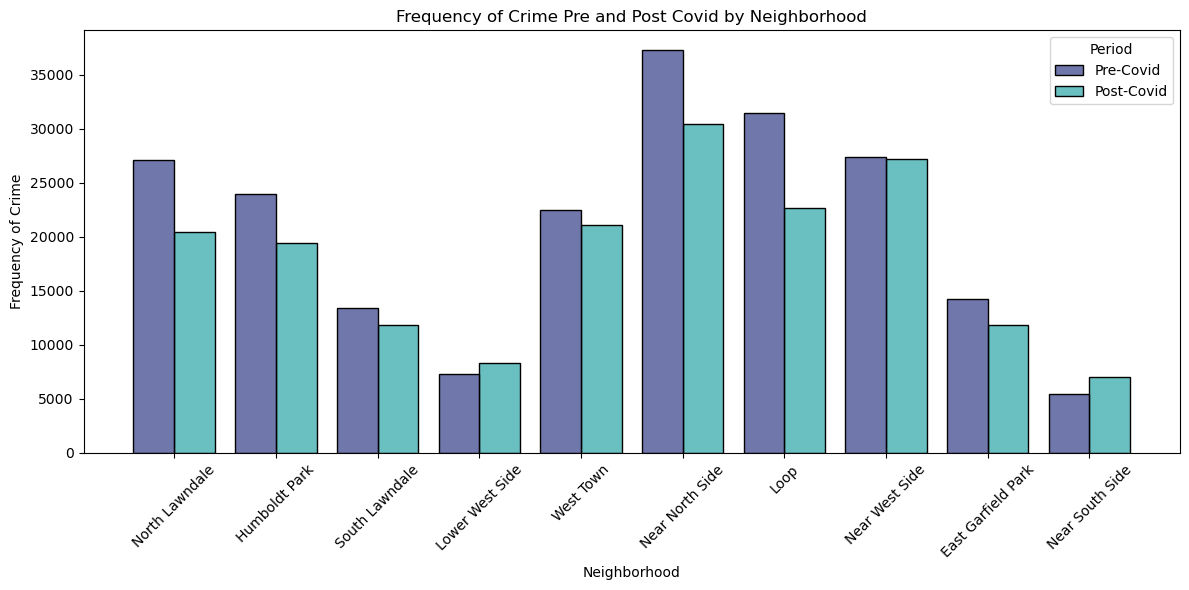

In [2]:
visualization_one()

#### Machine Learning
<h1 style="font-size: 12px">
Using supervised learning model, predict the probability of a person getting arrested given primary type of crime, location description and neighborhood(region name)

<b>Step 1</b>: Spliting

- Splitting the data into testing and training set using the decade crime data(`crime_data_2014.csv`). TO BE CAUTIOUS ABOUT NOT TOUCHING THE TESTING DATA.
    
<b>Step 2</b>: Best Feature

- Get the feature(s) which will give us the best accuracy (i.e only primary type, only primary type and RegionName and so on).
    The feature_selection_and_evaluation() function uses logistic regression model to get the best paramters.
    1) We use and encoder to change the string variables to 0s and 1s to make it easiser to fit and train the model
    2) We use k-cross validation to split into a K number of folds and is used to evaluate the model's ability when given new data to test our parameters
    3) Use logistic regression to fit and predict using the training data (~2 million entries)
    4) Return the best accuracy and the parameters for that accuracy

<b>Step 3</b>: Comparsion with baseline model which uses mode to predict the value
- Using Primary Type, Location Description, RegionName as input parameters for our logistic regression model we get an 87% accuracy. Comparing this to the baseline model which uses mode to predict the possibility of an arrest we get 80% accuracy. There is a 7% accuracy growth when using the Logistic Regression. Also note that our model is not under or overfitting since it is not 100% accurate nor 40-60% accurate

<b>Step 4</b>: Training/Testing the model

- Using the best feature that we got from best_feature() function, train the LogisticRegression Model using the same training set as earlier to avoid making new one
    1) Training the model
    2) Test the model
    3) Create new dataframe

</h1>



In [6]:
crime_data_2014 = pd.read_csv('csv_files/Crimes_2014.csv')
'''
    Step 1: Spliting
'''
X = crime_data_2014[['Primary Type', 'Location Description', 'RegionName']]
y = crime_data_2014['Arrest'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training, 20% testing
print("length of the training dataset",len(X_train))

'''
    best_feature method will perform step 2 and 3
'''
feature = best_feature(crime_data_2014, X_train, y_train)

''' train_test method will perform step 4 '''
train_test(X_train, X_test, y_train, y_test, feature) # Uses Logistic Regression Model to train and test our model


length of the training dataset 2008524
Best Features ['Primary Type', 'Location Description', 'RegionName'] Accuracy of Logistic Regression:  0.8786626398290486
Accuracy of the baseline model:  0.8083941242424786
Accuracy: 0.8786813029243307


,Primary Type,Location Description,RegionName,Prob
2178855,THEFT,SIDEWALK,Loop,0.071569
1869478,ASSAULT,ALLEY,Lake View,0.112263
1299827,THEFT,SIDEWALK,Englewood,0.076977
1024670,THEFT,SIDEWALK,West Town,0.054855
229033,BATTERY,STREET,Near South Side,0.200903


<b>Step 5</b>: Model Usage

<h1 style="font-size:12px">

Firstly we trained our model using the crime data from the past decade(2014-present) so that it can learn as much as possible. Then our stakeholder `Residents of Chicago, UIC students, new settlers and Chicago Police Department` can predict the probabilty of a person getting arrested based on the type of crime, neighborhood, and description of the location. This will be beneficial to determine how protected a neighborhood is. Our model will not give 100% accuracy on the prediction but it will predict the outcome 87.86% of the time correctly. In other terms, it be able to predict almost 9 out of 10 outcomes correctly. </h1>

#### Reflection
<h1 style="font-size: 12px">
<i>What is hardest part of the project that you’ve encountered so far?</i>

- The hardest part of this project was to understand the data, clean the data and how we can the housing dataset and crime dataset to come up with hypothesis. Second hardest part was to determine how our Machine Learning model can be useful to the stakeholder becasue ML model gives us the prediction, it's us who will determine how we can use it to solve our problem.

<i>What are your initial insights?</i>
- nothing

<i>Are there any concrete results you can show at this point? If not, why not?</i>
- Yes, We can show concrete results with our visualization. (Talk more about visulization)

<i>Going forward, what are the current biggest problems you’re facing?</i>
- The biggest problem we are facing is the merging of Housing Dataset and Crime Dataset since there are some neighborhoods which are in Housing Data but not in the Crime dataset while there are some neighborhoods which are in Crime Dataset but no in Housing Dataset.

<i>Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?</i>
- Yes, we set a personal due date for this project progess and we managed to finished all the parts efficiently

<i>Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how are you going to change your project and why do you think it’s better than your current results?</i>

- Yes, we have all the necessary information to do ML/Stats, Test our hypothesis, Come up with interesting finding and more
</h1>

#### Next Step
<!-- <div><img src= 'https://www.pocketmindfulness.com/wp-content/uploads/2017/03/baby-steps-approach.jpg' width=100></div> -->
<h1 style = "font-size: 12px">

<i>What you plan to accomplish in the next month and how you plan to evaluate whether your project achieved the goals you set for it.<i>
- We are planning to do T-Test on our hypothesis `There has been increase in crime after post covid` and to decide whether to reject or fail to reject the null hypothesis to determine significance. We will try to create another ML model where we will include the neighborhood average housing price to predict the chances of offender being arrest. On top of this, we will also try to discover more interesting finding using visualization with the help of our EDA

- We will `split the work` accordingly amongs the team member using GitHub Kanban board so there is a nice workflow and line of communication. We will also set a `personal due date` like a week before the actual project due date so we can resolve any loose-ends
</h1>